# Pymaceuticals Inc.
---

### Analysis

In this study we were tasked with analyzing a dataset containing the results of anti-cancer medication tested on mice. below are some observations based on the data and visuals we derived from this study.

- The population in the study stood at 51% male against 49% female. It was a close to even spread. This can easily be indentified by looking at the pie charts below.

- When looking at the effects of Capolmulin on one specific mouse (Mouse ID: l509) a decrease in Tumor Volume can be observed.
If we look at the line plot titled "Capolmulin treatment of mouse l509" we can notice an obvious downward trend in the Tumor Volume over time.

- By looking at the box plot comparing Capomulin, Ramicane, Infubinol, and Ceftamin we can deduce that both Capomulin and Ramicane are far more effective at reducing tumor volume than Infubol and Ceftamine. The box plot shows final tumor volume for mice under each specific drug regimen.




    
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
results = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
results.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [3]:
# Checking the number of mice.
total_mice = results["Mouse ID"].nunique()

total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

results["Mouse ID"].value_counts()


g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Set "Mouse ID" as index for easier cleaning
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

index_results = results.set_index("Mouse ID")

index_results.loc["g989"]

Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
Mouse ID                                                                 
g989              0           45.000000                 0     Propriva   
g989              0           45.000000                 0     Propriva   
g989              5           48.786801                 0     Propriva   
g989              5           47.570392                 0     Propriva   
g989             10           51.745156                 0     Propriva   
g989             10           49.880528                 0     Propriva   
g989             15           51.325852                 1     Propriva   
g989             15           53.442020                 0     Propriva   
g989             20           55.326122                 1     Propriva   
g989             20           54.657650                 1     Propriva   
g989             25           56.045564                 1     Propriva   
g989             30           59.082294                 1     Propriva   
g989             35           62.570880                 2     Propriva   

             Sex  Age_months  Weight (g)  
Mouse ID                                  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_results = index_results.drop("g989")

# Reset index back to previous after cleaning data. Used method found in link below.
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

clean_results = clean_results.reset_index()

clean_results

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1875     m601         25           33.118756                 1    Capomulin   
1876     m601         30           31.758275                 1    Capomulin   
1877     m601         35           30.834357                 1    Capomulin   
1878     m601         40           31.378045                 1    Capomulin   
1879     m601         45           28.430964                 1    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1     Female           9          22  
2     Female           9          22  
3     Female           9          22  
4     Female           9          22  
...      ...         ...         ...  
1875    Male          22          17  
1876    Male          22          17  
1877    Male          22          17  
1878    Male          22          17  
1879    Male          22          17  

[1880 rows x 8 columns]

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_results["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_data = clean_results.groupby(["Drug Regimen"])

tumor_mean = drug_data["Tumor Volume (mm3)"].mean()
tumor_median = drug_data["Tumor Volume (mm3)"].median()
tumor_variance = drug_data["Tumor Volume (mm3)"].var()
tumor_sdev = drug_data["Tumor Volume (mm3)"].std()
tumor_sem = drug_data["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.

tumor_size_df = pd.DataFrame({"Mean": tumor_mean,
                              "Median": tumor_median,
                              "Variance": tumor_variance,
                              "Standard Deviation": tumor_sdev,
                              "SEM": tumor_sem 
                             })

tumor_size_df

Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Had to look up aggregation in Pandas, founds this link helpful:
# https://datagy.io/pandas-groupby-multiple-columns/

# Using the aggregation method, produce the same summary statistics in a single line

agg_tumor_size_df = clean_results.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean", "median", "std", "var", "sem"])

agg_tumor_size_df

mean     median       std        var       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin      52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol     52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril      55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol      54.331565  52.509285  8.134708  66.173479  0.596466
Placebo       54.033581  52.288934  7.821003  61.168083  0.581331
Propriva      52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane      40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn      54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol     53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

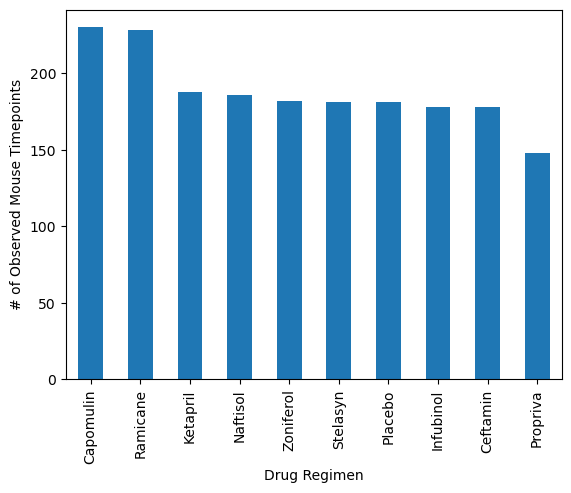

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Since each row of data represents a unique individual timepoint we can just count each instance of each value in the
# "Drug Regimen" column to get our total count of instances.

timepoint_counts = clean_results["Drug Regimen"].value_counts()


timepoint_counts.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", xlabel="Drug Regimen")

plt.show()

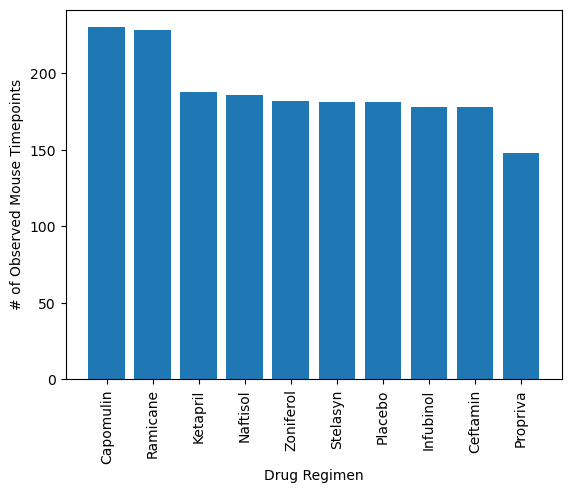

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# https://pandas.pydata.org/docs/reference/api/pandas.Index.values.html

timepoint_counts = clean_results["Drug Regimen"].value_counts()
x_axis = np.arange(len(timepoint_counts))

plt.bar(x_axis, timepoint_counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
tick = [value for value in x_axis]
plt.xticks(tick, timepoint_counts.index.values, rotation=90)
plt.show()

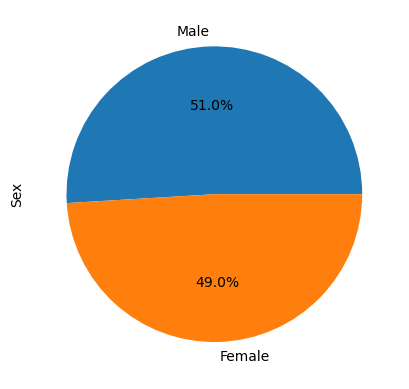

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_data = clean_results["Sex"].value_counts() 

sex_data.plot(kind="pie", autopct="%1.1f%%")

plt.show()

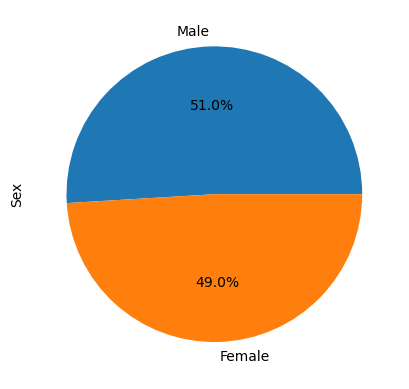

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_data = clean_results["Sex"].value_counts() 

plt.pie(sex_data, labels=sex_data.index.values, autopct="%1.1f%%")
plt.ylabel("Sex", rotation=90)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
# Greatest timepoint would be the highest number so used the .max() function to find it

last_timepoint = clean_results.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

combined_last_timepoint = pd.merge(last_timepoint, clean_results, on=["Mouse ID", "Timepoint"], how="left")

combined_last_timepoint

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [52]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in treatments:
    
   
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
 
    treatment_df = combined_last_timepoint.loc[combined_last_timepoint["Drug Regimen"] == treatment]
       
    # add subset 
    
    tumor_size = treatment_df["Tumor Volume (mm3)"]
    
    tumor_data.append(tumor_size)
  
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_size.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The IQR for {treatment} is {iqr}.")
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
        
    
    outliers = (treatment_df.loc[(treatment_df["Tumor Volume (mm3)"] >= upper_bound) | (treatment_df["Tumor Volume (mm3)"] <= lower_bound)])
    
    print(f"The outliers for {treatment} are {outliers}")
    



The IQR for Capomulin is 7.781863460000004.
The outliers for Capomulin are Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
The IQR for Ramicane is 9.098536719999998.
The outliers for Ramicane are Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
The IQR for Infubinol is 11.477135160000003.
The outliers for Infubinol are    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
31     c326          5           36.321346                 0    Infubinol   

       Sex  Age_months  Weight (g)  
31  Female          18          25  
The IQR for Ceftamin is 15.577752179999997.
The outliers for Ceftamin are Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


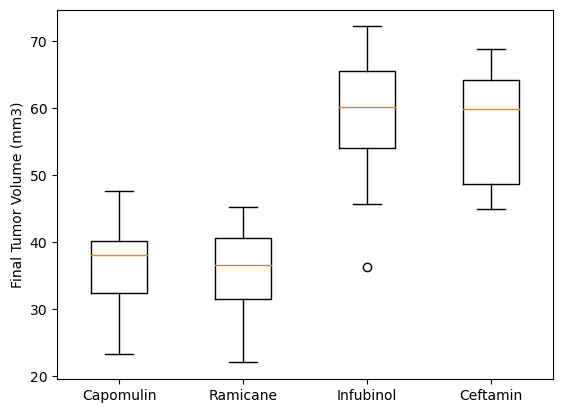

In [47]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_data)
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], treatments)

plt.show()

## Line and Scatter Plots

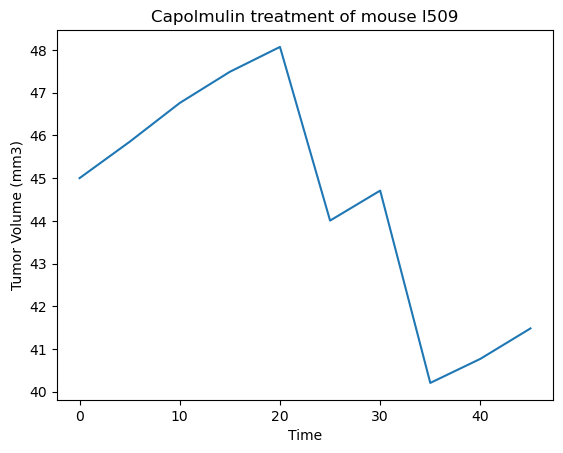

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509_data = clean_results.loc[clean_results["Mouse ID"] == "l509",:]

l509_timepoint = l509_data["Timepoint"]
l509_tumor_volume = l509_data["Tumor Volume (mm3)"]

plt.plot(l509_timepoint, l509_tumor_volume)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capolmulin treatment of mouse l509")

plt.show()

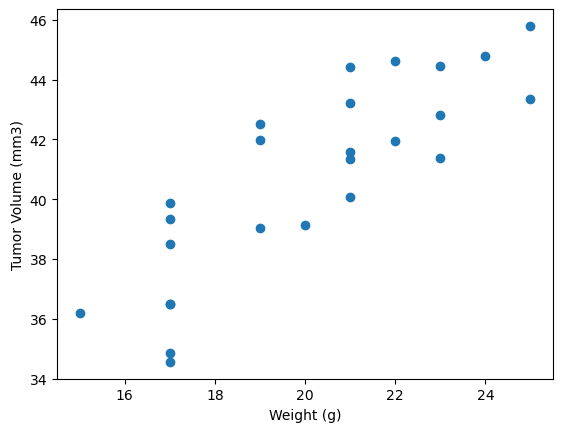

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Isolate data to just Capomulin
capomulin_data = clean_results.loc[clean_results["Drug Regimen"] == "Capomulin",:]

# Create x and y values by grouping capomulin data by "Mouse ID" and then calculating the mean of both 
# the weight and tumor volume 
weight = capomulin_data.groupby(["Mouse ID"])["Weight (g)"].mean()
tumor_volume_mean = capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(weight, tumor_volume_mean, marker="o" )
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


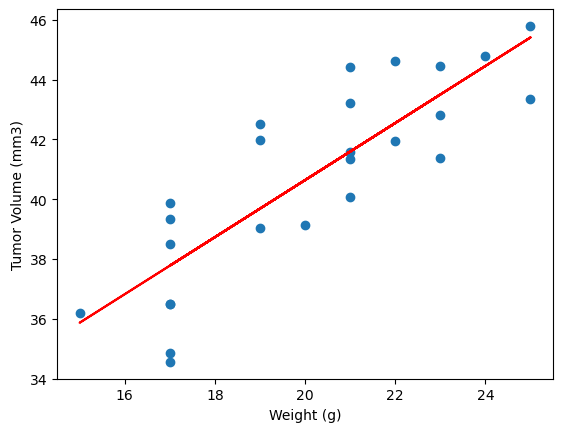

In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Used value calculated for scatter plot above
# Used code from Module 5.3 08-Ins_Fits_and_Regression example

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_volume_mean)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()

